In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils_iFEMG_feature import NotchFilter, ButterFilter

In [88]:
# 读取原始数据
raw_data = pd.read_table(r"E:\Data\paper2\iFEMG\lpy-2\bi-2.db", sep = ';', header = None)
raw_data.head

<bound method NDFrame.head of                              0     1   2     3     4   5   6   7   8     9   \
0       2023-04-27 16:14:19,993     0   0     0  3876   0   0   0   0   559   
1       2023-04-27 16:14:19,993   424   0  2230  3911   0   0   0   0  1777   
2       2023-04-27 16:14:19,994   469   0  2230  3911   0   0   0   0  1382   
3       2023-04-27 16:14:19,994   469   0  2230  3911   0   0   0   8  1154   
4       2023-04-27 16:14:19,994   469   0  2230  3911   0   0   0   8   867   
...                         ...   ...  ..   ...   ...  ..  ..  ..  ..   ...   
148560  2023-04-27 16:16:21,841  4265   0  3584  5911   0   0   0   0  1120   
148561  2023-04-27 16:16:21,841  4265   0  3584  5911   0   0   0   8  1638   
148562  2023-04-27 16:16:21,842  4265   0  3584  5911   0   0   0   8  2313   
148563  2023-04-27 16:16:21,842  4265   0  3584  5911   0   0   0   8  2316   
148564  2023-04-27 16:16:21,842  4265   0  3584  5911   0   0   0   8  2169   

         10    11    

In [89]:
# 采样频率 1626 或 1222
fs = 1222
# 读取每通道信号
FMG1 = raw_data.iloc[:, 1].values
FMG2 = raw_data.iloc[:, 3].values
FMG3 = raw_data.iloc[:, 4].values
sEMG1 = raw_data.iloc[:, 9].values
sEMG2 = raw_data.iloc[:, 11].values
sEMG3 = raw_data.iloc[:, 12].values

In [90]:
# sEMG信号滤波
filter1 = NotchFilter(f0=50, fs=fs, Q=10)
filter2 = NotchFilter(f0=150, fs=fs, Q=10)
filter3 = NotchFilter(f0=203.7, fs=fs, Q=10)
filter4 = NotchFilter(f0=250, fs=fs, Q=10)
filter5 = NotchFilter(f0=350, fs=fs, Q=10)
filter6 = NotchFilter(f0=407.4, fs=fs, Q=10)
filter7 = NotchFilter(f0=450, fs=fs, Q=10)
bandpassfilter = ButterFilter(fs = fs, fc = [10, 500], order = 8, ftype='bandpass')

sEMG1_filtered = bandpassfilter.filt(filter7.filt(filter6.filt(filter5.filt(filter4.filt(filter3.filt(filter2.filt(filter1.filt(sEMG1))))))))
sEMG2_filtered = bandpassfilter.filt(filter7.filt(filter6.filt(filter5.filt(filter4.filt(filter3.filt(filter2.filt(filter1.filt(sEMG2))))))))
sEMG3_filtered = bandpassfilter.filt(filter7.filt(filter6.filt(filter5.filt(filter4.filt(filter3.filt(filter2.filt(filter1.filt(sEMG3))))))))

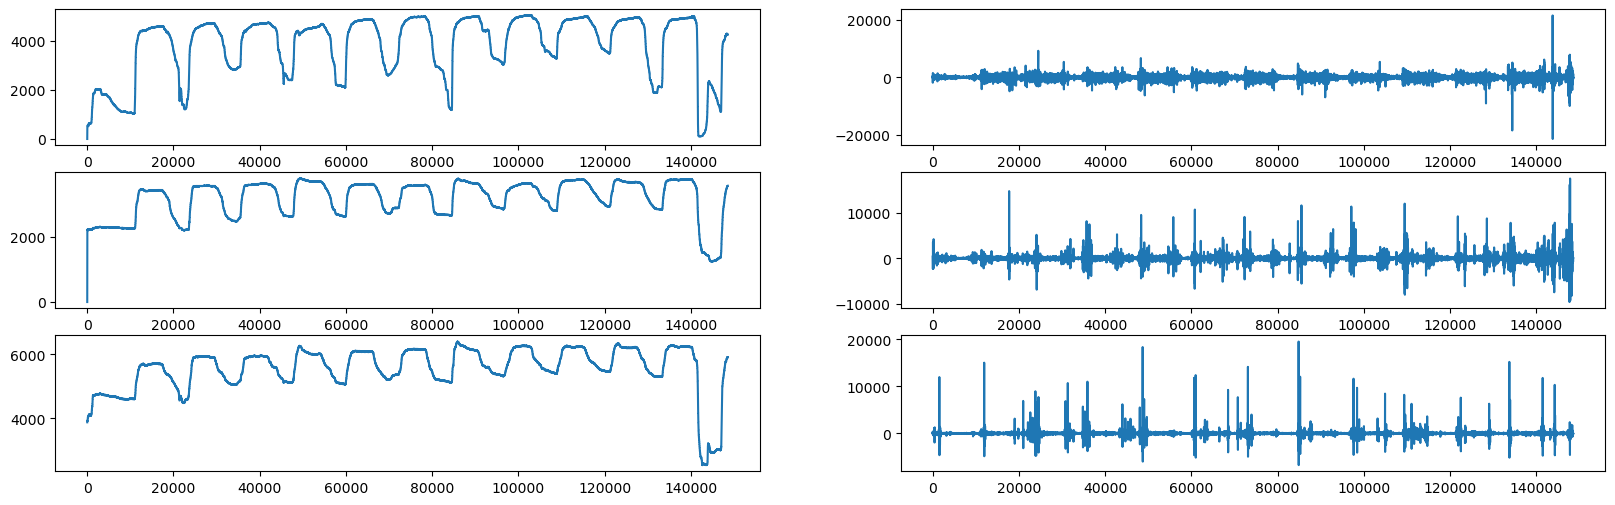

In [91]:
plt.figure(figsize=(20,6))
plt.subplot(3,2,1)
plt.plot(FMG1)
plt.subplot(3,2,3)
plt.plot(FMG2)
plt.subplot(3,2,5)
plt.plot(FMG3)
plt.subplot(3,2,2)
plt.plot(sEMG1_filtered)
plt.subplot(3,2,4)
plt.plot(sEMG2_filtered)
plt.subplot(3,2,6)
plt.plot(sEMG3_filtered)
plt.show()
